In [ ]:
pip install us

In [ ]:
import pandas as pd
import us
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ML_data_Age.csv to ML_data_Age.csv


In [50]:
merged_df = pd.read_csv('ML_data_Age.csv')
merged_df
merged_values_df = merged_df[['Administered Dose Per 100k','Death Per 100k','Avg Temp (F)','Population Estimate','65 plus per 100k', '5 Under per 100k']]
merged_values_df

,Administered Dose Per 100k,Death Per 100k,Avg Temp (F),Population Estimate,65 plus per 100k,5 Under per 100k
0,46701.317836,3139.068511,63.3,24434.0,23291.315380,4808.872882
1,66411.159695,3917.576873,70.9,56489.0,16955.513463,6898.688240
2,84322.633052,4867.775806,60.1,33239.0,26757.724360,5138.542074
3,69042.432143,3086.493873,52.0,524673.0,16779.212957,4952.417982
4,52875.896603,4547.300041,51.2,7389.0,22980.105562,6239.003925
...,...,...,...,...,...,...
2931,117542.831147,3491.213342,72.8,213221.0,21012.470629,6621.768025
2932,51723.788278,3092.678970,51.2,9862.0,18657.473129,6976.272561
2933,74541.351194,1274.024461,76.7,13736.0,13511.939429,7069.015725
2934,78447.164948,1814.862543,73.6,9312.0,14712.199313,7882.302405


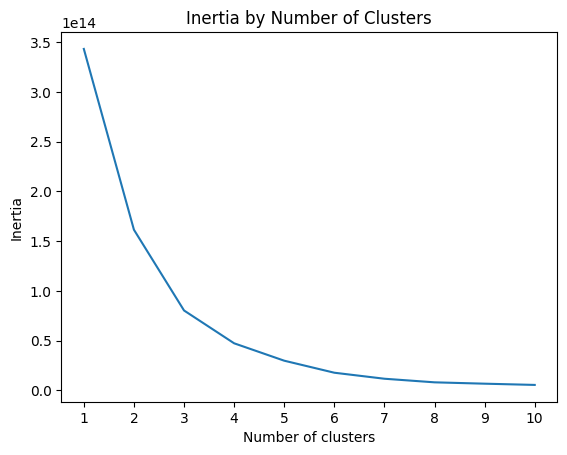

In [51]:
inertia = []

k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(merged_values_df)
    inertia.append(k_model.inertia_)

elbow_data = {"k": k, "inertia": inertia}

df_elbow = pd.DataFrame(elbow_data)

# Plot the DataFrame
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia by Number of Clusters')
plt.show()

In [52]:

merged_values_scaled = StandardScaler().fit_transform(merged_values_df[['Administered Dose Per 100k','Death Per 100k','Population Estimate','65 plus per 100k', '5 Under per 100k']])

# Creating a DataFrame with with the scaled data
merged_values_transformed = pd.DataFrame(merged_values_scaled, columns=['Administered Dose Per 100k','Death Per 100k','Population Estimate','65 plus per 100k','5 Under per 100k'])

# Display sample data
merged_values_transformed.head()

,Administered Dose Per 100k,Death Per 100k,Population Estimate,65 plus per 100k,5 Under per 100k
0,-0.760844,-0.376218,-0.249164,0.512806,-0.628523
1,0.270214,0.252995,-0.155237,-0.800547,1.402322
2,1.207196,1.020974,-0.223364,1.231360,-0.308156
3,0.407861,-0.418710,1.216635,-0.837092,-0.489028
4,-0.437840,0.761956,-0.299109,0.448295,0.761253


In [53]:
model = KMeans(n_clusters=5, random_state=0)

model.fit(merged_values_transformed)

predictions = model.predict(merged_values_transformed)

predictions = pd.DataFrame(predictions, columns=['cluster'])

merged_df = pd.concat([merged_df, predictions], axis=1)

merged_df.head(30)

,County,State,Administered_Dose_Count,Death Per 100k,Avg Temp (F),Max Temp (F),Min Temp (F),Population Estimate,Administered Dose Per 100k,65 plus per 100k,5 Under per 100k,cluster
0,Abbeville County,South Carolina,11411.0,3139.068511,63.3,74.5,52.2,24434.0,46701.317836,23291.315380,4808.872882,4
1,Acadia Parish,Louisiana,37515.0,3917.576873,70.9,81.2,60.6,56489.0,66411.159695,16955.513463,6898.688240,0
2,Accomack County,Virginia,28028.0,4867.775806,60.1,69.1,51.1,33239.0,84322.633052,26757.724360,5138.542074,1
3,Ada County,Idaho,362247.0,3086.493873,52.0,63.8,40.3,524673.0,69042.432143,16779.212957,4952.417982,4
4,Adair County,Iowa,3907.0,4547.300041,51.2,62.7,39.7,7389.0,52875.896603,22980.105562,6239.003925,2
5,Adair County,Kentucky,8737.0,2777.200997,58.5,69.3,47.8,19264.0,45354.028239,20042.566445,4858.803987,4
6,Adair County,Missouri,13895.0,3152.615238,54.3,65.6,43.0,25122.0,55310.086777,15695.406417,5345.911950,4
7,Adair County,Oklahoma,12543.0,3327.049473,61.3,72.8,49.7,19627.0,63906.862995,15972.894482,6949.610231,0
8,Adams County,Colorado,404976.0,2851.705680,49.3,64.0,34.6,533365.0,75928.491746,11569.563057,6226.692790,0
9,Adams County,Idaho,2135.0,2161.941668,44.0,54.6,33.4,4903.0,43544.768509,31756.067714,3406.077911,1


In [55]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Step 3: Define features (X) and target (y)
features = ['Administered Dose Per 100k','Population Estimate','65 plus per 100k', '5 Under per 100k']
X = merged_df[features]
y = merged_df['Death Per 100k']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose and train the model
# Try Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Try Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the models
# Predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluation Metrics
lr_mae = mean_absolute_error(y_test, lr_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
lr_r2 = r2_score(y_test, lr_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("Linear Regression MAE:", lr_mae)
print("Linear Regression R^2:", lr_r2)
print("Random Forest MAE:", rf_mae)
print("Random Forest R^2:", rf_r2)



Linear Regression MAE: 863.7319019507707
Linear Regression R^2: 0.06995295207954932
Random Forest MAE: 844.3663573474831
Random Forest R^2: 0.07856058483212047


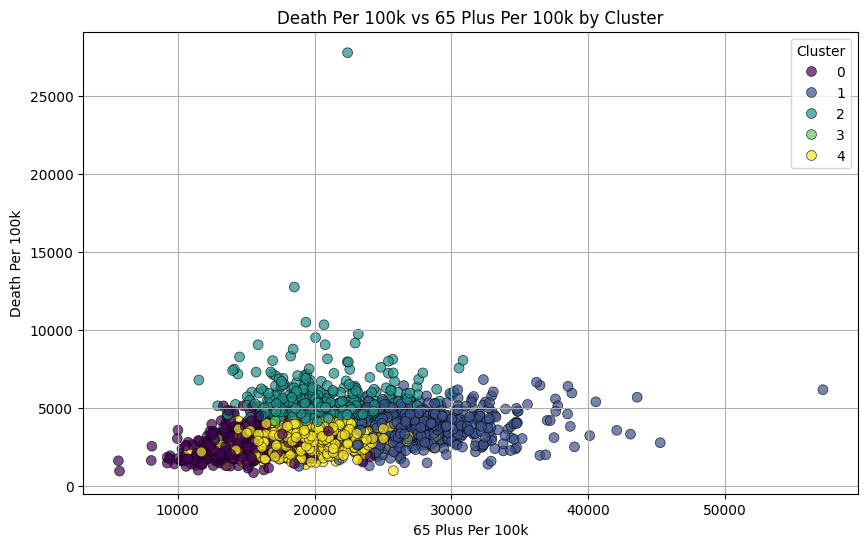

In [63]:
# Step 1: Import the required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create the scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=merged_df,               # Data source
    x='65 plus per 100k',         # X-axis: 65 plus per 100k
    y='Death Per 100k',           # Y-axis: Death Per 100k
    hue='cluster',                # Color by cluster
    palette='viridis',            # Color palette (adjust as needed)
    s=50,                        # Point size
    edgecolor='black',            # Border color for points
    alpha=0.7                     # Transparency for points
)

# Step 3: Customize the plot
plt.title('Death Per 100k vs 65 Plus Per 100k by Cluster')
plt.xlabel('65 Plus Per 100k')
plt.ylabel('Death Per 100k')
plt.legend(title='Cluster')
plt.grid(True)

# Step 4: Display the plot
plt.show()


In [56]:
cluster_group = merged_df.groupby('cluster')
cluster_group['Death Per 100k'].mean()

,Death Per 100k
cluster,
0,2748.873718
1,3702.541156
2,5225.384188
3,3039.173775
4,3169.580284


In [57]:
cluster_group['Administered Dose Per 100k'].mean()

,Administered Dose Per 100k
cluster,
0,74004.955592
1,64059.446211
2,60298.874911
3,86822.013050
4,54832.276224


In [58]:
cluster_group['Population Estimate'].mean()/100

,Population Estimate
cluster,
0,2275.529642
1,448.856109
2,891.704937
3,25953.723448
4,481.832662


In [59]:
cluster_group['65 plus per 100k'].mean()

,65 plus per 100k
cluster,
0,15318.094233
1,27151.333310
2,20747.765763
3,16179.993096
4,19894.991667


In [60]:
cluster_group['5 Under per 100k'].mean()

,5 Under per 100k
cluster,
0,6601.191474
1,4319.819359
2,5658.908821
3,5511.852076
4,5493.293614
